# Fonctionnement d'un programme récursif

---
## Un exemple pour commencer : la factorielle

### Définition

En mathématiques, la **factorielle** d'un entier naturel $n$ est le produit des nombres entiers strictement positifs inférieurs ou égaux à $n$.  
La factorielle de $n$ se note avec un point d'exclamation : $n!$ et se lit soit « *factorielle de n* », soit « *factorielle n* », soit « *n factorielle* »

On peut définir formellement la factorielle de la manière suivante :  


<center>$$n!=\prod_{k=1}^n k = 1 \times 2 \times 3 \times ... \times (n-1) \times n$$</center>

Par exemple on a : 

$1! = 1$  
$2! = 1 × 2 = 2$  
$3! = 1 × 2 × 3= 6$  
$4! = 1 × 2 × 3 × 4= 24$  
$10! = 1 × 2 × 3 × 4 × 5 × 6 × 7 × 8 × 9 × 10 = 3~628~800$  

### Valeur de  $0!$

Par convention, $0!$ vaut 1 

### Première implémentation : approche itérative

Le programme ci dessous implémente la fonction factorielle, on différencie le cas $n=0$ et dans les autres cas on fait le produit de 1 à n.

In [ ]:
def facI(n):
    # Cas où n vaut 0
    if n == 0 :
        return 1
    # Autres cas : on fait le produit de 1 à n
    else :
        f=1
        for i in range (1,n+1):
            f=f*i
        return f

In [ ]:
# Vérification
facI(10)

### Définition par récurence


Comme pour les suites en mathématiques, on peut aussi définir la **factorielle** d'un entier naturel par **récurence** : pour définir la valeur de la fonction pour l'entier $n$, on utilise les valeurs de cette même fonction pour des entiers inférieurs. 

Cette définition nécessite deux informations fondamentales :
- La valeur du premier élément
- La méthode de calcul d'un élément à partir de l'élément précédent

Ainsi, on peut définir la fonction **factorielle** de la manière suivante :

- $0! = 1$
- Pour tout entier n > 0, $n! = (n – 1)! × n$.

### Deuxième implémentation : approche récursive

En utilisant cette définition, on peut implémenter la fonction **factorielle** différemment, en informatique on appelle cette approche l'approche **récursive**

In [ ]:
def facR(n) :
    # Cas où n vaut 0
    if n == 0 :
        return 1
    # Autres cas : on appelle la fonction avec l'entier précédent
    else :
        return facR(n-1)*n

In [ ]:
# Vérification
facR(10)

---
## Fonctionnement d'un programme récursif

### Définition

La récursivité est un des concepts de bases de l'informatique. Une fonction récursive est une fonction **qui s'appelle elle-même**.

> En informatique un algorithme **récursif** est un algorithme qui s'appelle lui-même en opposition à un algorithme **itératif** qui sera plutot composé de boucles *pour* (`for`) ou *tant que*  (`while`)

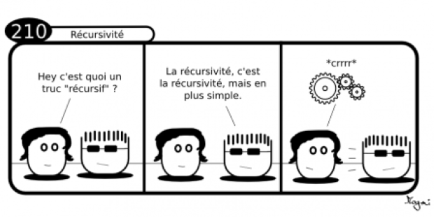


### Exécution

Lors de l'appel d'une fonction récursive, une **structure de pile** est utilisée, nous étudierons ce type de structures plus en détail en cours d'année, pour simplifier il faut voir cela comme une pile d'assiettes avec lesquelles on peut seulement ampiler une nouvelle assiette ou dépiler la première.

Si nous revenons a notre fonction factorielle, pour calculer $4!$ :  

4 ! = 4 x 3! : impossible a résoudre directement car nous ne connaissons pas la valeur 3! donc on empile 4 et 3!  
4 ! = 4 x 3 x 2! : impossible a résoudre directement car nous ne connaissons pas la valeur 2! donc on empile 4,3 et 2!  
4 ! = 4 x 3 x 2 x 1! : impossible a résoudre directement car nous ne connaissons pas la valeur 1! donc on empile 4,3,2 et 1!  
4 ! = 4 x 3 x 2 x 1 x 0! : Ici nous connaissons la valeur 0! donc on empile 4,3,2,1 et enfin 0! qui vaut 1  

Maintenant nous allons dépiler :  
4 ! = 4 x 3 x 2 x (1 x 1)  
4 ! = 4 x 3 x (2 x 1)  
4 ! = 4 x (3 x 2)  
4 ! = 4 x 6  
4 ! = 24  

On peut représenter l'évolution de la pile ainsi :

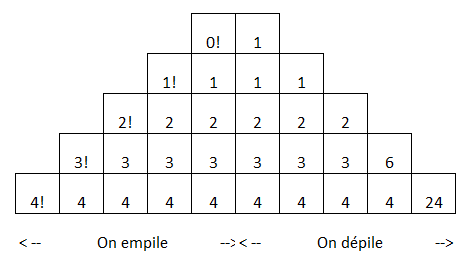


### Structure

Pour écrire une fonction récursive il faut impérativement :
>1. Déterminer un **cas de base**, c’est à dire une valeur de l’argument pour laquelle le problème se résout immédiatement et renvoie directement une valeur (dans le cas de factorielle : 0! = 1)
>2. Traiter **l'appel récursif** avec le passage des valeurs renvoyées par l’appel précédent (dans le cas de factorielle : n! = n x (n-1)!)

*Remarque : Une fonction récursive, contrairement au bon usage habituel dans une fonction, va le plus souvent avoir plusieurs return : au minimum un pour le cas de base (il peut y en avoir plusieurs) et un pour l'appel récursif (il peut y en avoir plusieurs également).*


### Attention au cas de base !

Si le cas de base est oublié, la fonction s'appellera indéfiniement, ceci entraînera un dépassement de la pile d'exécution de l'ordinateur, en anglais la célèbre **Stack Overflow**

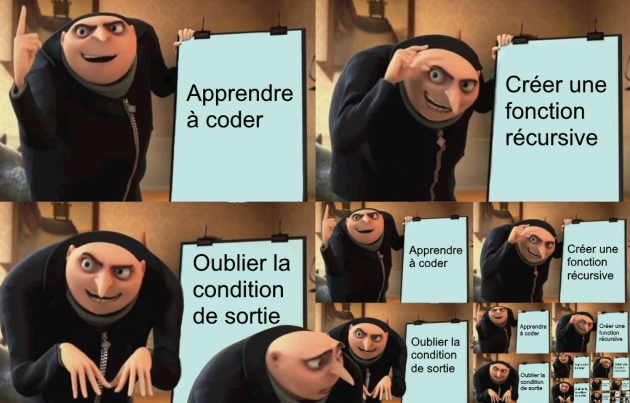

En python, le nombre d'appels récursifs d'une fonction est limité par défaut a 1000 pour éviter le dépassement. Cette valeur est modifiable par l'utilisateur.

Le programme suivant illustre l'oubli du cas de base :


In [ ]:
def infini (n):
    return infini(n-1)

In [ ]:
# Vérification
infini(10)

### Terminaison et correction

Pour prouver qu’un algorithme récursif fonctionne on doit prouver qu’il vérifie deux propriétés :
1. Terminaison : l’algorithme doit se terminer.
2. Correction : si l’algorithme se termine, il doit renvoyer ce que l’on souhaite. Pour prouver cette correction partielle il faut montrer que si les appels internes renvoient la bonne valeur, alors la fonction aussi, c’est le même principe qu’une démonstration par récurrence en mathématiques

Dans notre cas :
- Les appels récursifs se font en fonction de $n-1$ et la suite $n, n-1, n-2 ...$ décroît et arrivera à 0.
- On connait la valeur de $0!$ donc le programme se terminera

si pour on a determiné la valeur de $k!$ pour un $k$ donné, alors l'appel suivant calculera $(k+1) × k! = (k+1)!$ donc determinera la valeur de factorielle pour $k+1$ ce qui est le résultat attendu.


### Des formulations plus riches

Toute formulation récursive comporte au moins un cas de base et un cas récursif. Mais une grande variété de formes est
possible.

#### Plusieurs cas de base
Par exemple la définition de la fonction puissance ($x^{n}$) peut se faire ainsi :

$puissance(x,n) = $
- $1$ si $n = 0$
- $x$ si $n = 1$
- $x ×$ $puissance(x,n-1) si n>1$

#### Appels récursifs multiples.
Dans certains cas, la définition s'appelle plusieurs fois. Voici par exemple la définition de la célèbre suite de Fibonacci :

$fibo(n) =$
- $1$ si $n = 0$
- $1$ si $n = 1$
- $fibo(n-1) + fibo(n-2)$ si $n>1$

---
## Exercices

### 1. Puissance
En utilisant la definition ci-dessus, écrivez ci-dessous une fonction **récursive** nommée `puissance` qui prend en paramètres deux entiers `x` et `n` et qui calcule $x^{n}$

In [ ]:
def puissance(x,n):
    # à compléter
    

In [ ]:
# Vérification
puissance(3,5)

### 2. Somme itérative
Ecrivez ci-dessous une fonction **itérative** (avec une boucle `for`) nommée `sommeI` qui prend en paramètre un entier `n` et calcule la somme des entiers 0 à `n`

In [ ]:
def sommeI(n):
    # à compléter
    

In [ ]:
# Vérification
sommeI(100)

### 3. Somme récursive
Ecrivez maintenant une version **récursive** de la même fonction nommée `sommeR`

In [ ]:
def sommeR(n):
    # à compléter
    

In [ ]:
# Vérification
sommeR(100)

### 4. Rebours
Écrivez une fonction **récursive** `rebours(n)` qui affiche les nombres entiers à rebours de `n` à `0` puis le mot `ignition` (utilisez  `print` ici)


In [ ]:
def rebours(n):
    # à compléter
    

In [ ]:
# Vérification
rebours(10)

### 5. Plus Grand Commun Diviseur
Écrivez une fonction **récursive** `pgcd(a,b)` renvoyant le plus grand diviseur commun de deux nombres `a` et `b`.  
Pour cela on utilisera le résultat mathématique suivant :  

$pgcd(a,b) = pgcd(b,r)$  , où $r$ est le reste de la division euclidienne de $a$ par $b$.


In [ ]:
def pgcd(a,b):
    # à compléter
    

In [ ]:
# Vérification : doit valoir 4
pgcd(236,1292)

### 6. Calcul des intérêts
Si vous placez de l'argent à la banque une somme $s$ avec un taux d'intérêt $t\%$, la première année le montant de vos intérêts sera : $\frac{s × t}{100}$  et votre capital sera donc de $t + \frac{s × t}{100}$

Par exemple si vous placez $1~000€$ à $4\%$, au bout d'un an les intérêts seront de $\frac{1~000 × 4}{100} = 40€$ et vous disposerez donc l'année suivante d'un capital de $1~040€$

Écrivez une fonction **récursive** `placement(cap,tx,an)` où   `cap` représente votre capital de départ, `tx` le taux d'intérêt du placement et `an` le nombre d'années de placement et qui renvoie le nouveau montant de votre capital `cap` au bout de `an` années placé à un taux de `tx` %.

In [ ]:
def placement(cap,tx,an):
    # à compléter

In [ ]:
# Vérification
placement(1000,4,10)

### 7. Tri
Écrivez une fonction **récursive** `is_sorted(li)` qui prend en paramètre une liste d'entiers `li` et décide si elle est trié par ordre croissant (en renvoyant `True`) ou pas (en renvoyant `False`)

In [ ]:
def is_sorted(li):
    # à compléter

In [ ]:
# Vérification
is_sorted([1,2,3,4,5,6,7,8,9,10,12,11,13])

### 8. Suite de Fibonacci

Comme abordé ci dessus, la célèbre suite de Fibonacci est définie de la manière suivante :

$fibo(n) =$
- $1$ si $n = 0$
- $1$ si $n = 1$
- $fibo(n-1) + fibo(n-2)$ si $n>1$

Vous trouverez ci-dessous une version itérative de la suite :

In [ ]:
# Vérification
def fiboI(n):
    if n==0 :
        return 1
    elif n==1:
        return 1
    
    a = 1
    b = 1
    c = 0
    for i in range(1,n):
        c = a + b
        a = b
        b = c
    return c


In [ ]:
for i in range (8) :
    print (fiboI(i))

Ecrivez maintenant une version **récursive** de la suite

In [ ]:
def fiboR(n):
    # à compléter
    

A l'aide du TP sur les tris, comparez les performances des versions itératives et récursives de la fonction.  
<center><span style="color:red"><b><font size="3">
Attention, sauvegardez votre notebook avant de lancer une fonction qui traite un gros volume de données...
</font></b></span></center>

In [ ]:
# à compléter
